In [1]:
# Core Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Use TensorFlow's built-in Keras (recommended since TF 2.x)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
df=pd.read_csv("/content/Mental Health Dataset.csv")
df.head(5)

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [3]:
df.isnull().sum()

,0
posts,1
predicted,0
intensity,0


In [4]:
df['posts']=df['posts'].fillna("empty")

In [5]:
import nltk
nltk.download('popular')
nltk.download('punkt_tab')
stop=stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [6]:
# def all_inone(text):
#   text=re.sub(r'[^a-z]\s',' ',text)
#   tokens=word_tokenize(text)
#   token_stop=[i for i in tokens if i not in  stop]
#   le=WordNetLemmatizer()
#   l=[]
#   for i in token_stop:
#     word=le.lemmatize(i,pos='v')
#     l.append(word)
#   return " ".join(l)
def all_inone(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t, pos='v') for t in tokens]

    return " ".join(tokens)




In [7]:
# df['posts']=df['posts'].apply(lambda x:all_inone(x))
df['posts'] = df['posts'].apply(all_inone)


In [36]:
df

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,0,-1
1,heart know future promise article regardless h...,1,0
2,mylefibrosis turn leukemia want stem cell tran...,0,-1
3,one health group subject wayne dyer leukemia c...,1,0
4,gmos link leukemia http nsnbc gmo link leukemi...,1,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,0,-1
10388,surgery stage colon cancer year ago cea level ...,3,-2
10389,doctor advise could remove abnormal polyp chri...,1,0
10390,year old father much past year really need try...,1,0


In [9]:
target=df['predicted'].unique()

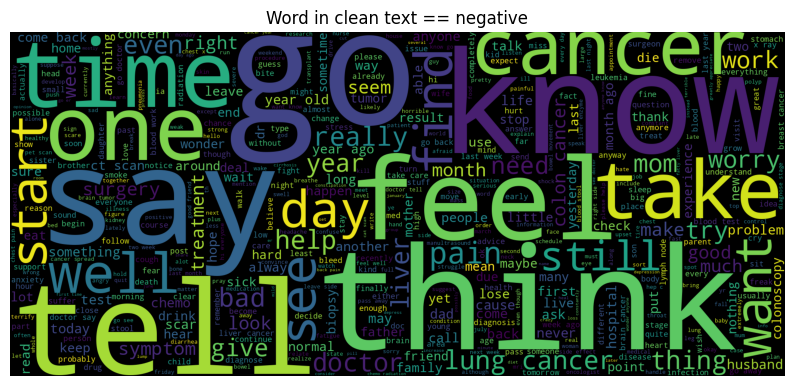

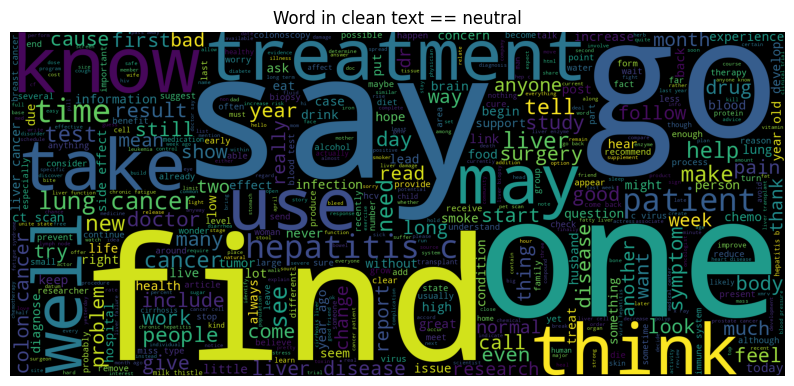

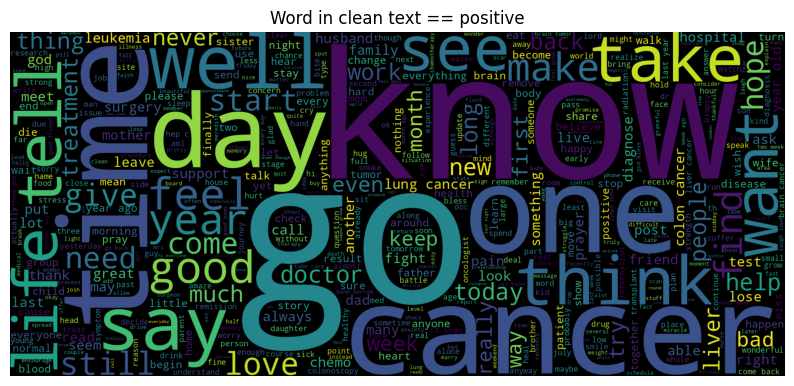

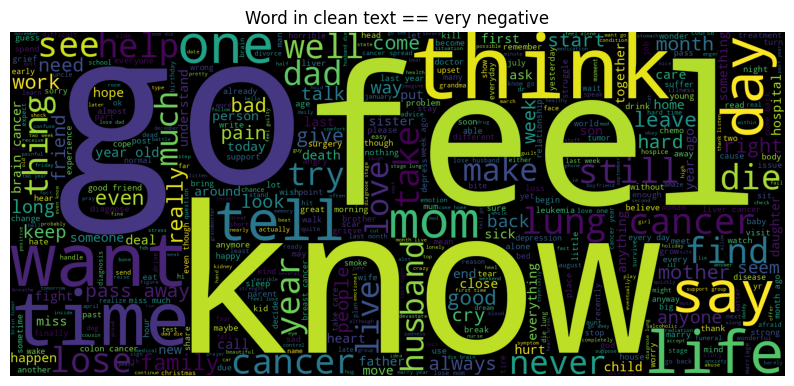

In [10]:
for i in target :
  plt.figure(figsize=(10,8))
  word_cloud=WordCloud(width=1800,height=800,max_words=500).generate(' '.join(df[df.predicted == i].posts))
  plt.imshow(word_cloud)
  plt.title(f'Word in clean text == {i}')
  plt.axis('off')
  plt.show()

In [11]:
df['predicted'].value_counts()

,count
predicted,
neutral,4375
negative,4112
very negative,1155
positive,750


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['predicted']=le.fit_transform(df['predicted'])

In [13]:
x=df['posts']
y=df['predicted']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

In [14]:
# tfidf=TfidfVectorizer(max_features=3000,ngram_range=(1,2),min_df=3, max_df=0.9,sublinear_tf=True)
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,3),
    min_df=2,
    max_df=0.85,
    sublinear_tf=True
)

x_train_vec=tfidf.fit_transform(x_train)
x_test_vec=tfidf.transform(x_test)

In [15]:
x_train_dense = x_train_vec.toarray()
x_test_dense  = x_test_vec.toarray()


In [46]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2

# model = Sequential([
#      Dense(
#         512,
#         activation='relu',
#         kernel_regularizer=l2(0.001),
#         input_shape=(x_train_dense.shape[1],)
#     ),
#     Dropout(0.2),

#     Dense(
#         256,
#         activation='relu',
#         kernel_regularizer=l2(0.001),
#         input_shape=(x_train_dense.shape[1],)
#     ),
#     Dropout(0.2),

#     Dense(
#         64,
#         activation='relu',
#         kernel_regularizer=l2(0.001)
#     ),
#     Dropout(0.2),

#     Dense(4, activation='softmax')
# ])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(
        256,
        activation='relu',
        kernel_regularizer=l2(0.001),
        input_shape=(x_train_dense.shape[1],)
    ),
    Dropout(0.6),

    Dense(
        64,
        activation='relu',
        kernel_regularizer=l2(0.001)
    ),
    Dropout(0.6),

    Dense(4, activation='softmax')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [55]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    x_train_dense,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    class_weight=class_weight_dict,
     callbacks=[early_stop]
)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4507 - loss: 1.5072 - val_accuracy: 0.6548 - val_loss: 1.1576
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6960 - loss: 1.0852 - val_accuracy: 0.6897 - val_loss: 1.1833
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7700 - loss: 0.9540 - val_accuracy: 0.7054 - val_loss: 1.1553
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8105 - loss: 0.9238 - val_accuracy: 0.6927 - val_loss: 1.2241
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8307 - loss: 0.8858 - val_accuracy: 0.7156 - val_loss: 1.1922


In [57]:
model.evaluate(x_test_dense, y_test)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 1.1544


[1.1435115337371826, 0.7070707082748413]

In [58]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test_dense), axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
               precision    recall  f1-score   support

     negative       0.77      0.62      0.69       823
      neutral       0.78      0.80      0.79       875
     positive       0.36      0.53      0.42       150
very negative       0.61      0.78      0.68       231

     accuracy                           0.71      2079
    macro avg       0.63      0.68      0.65      2079
 weighted avg       0.73      0.71      0.71      2079



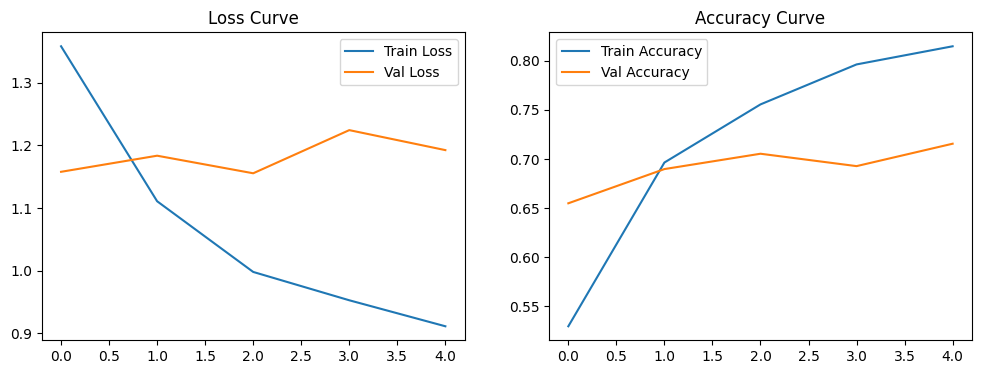

In [59]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()


In [60]:
model.evaluate(x_test_dense, y_test)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 1.1544


[1.1435115337371826, 0.7070707082748413]

In [61]:
y_pred = np.argmax(model.predict(x_test_dense), axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
               precision    recall  f1-score   support

     negative       0.77      0.62      0.69       823
      neutral       0.78      0.80      0.79       875
     positive       0.36      0.53      0.42       150
very negative       0.61      0.78      0.68       231

     accuracy                           0.71      2079
    macro avg       0.63      0.68      0.65      2079
 weighted avg       0.73      0.71      0.71      2079



In [62]:
def validate_samples(text_list):
    for text in text_list:
        cleaned = all_inone(text)
        vec = tfidf.transform([cleaned]).toarray()
        pred = np.argmax(model.predict(vec), axis=1)
        label = le.inverse_transform(pred)[0]

        print("TEXT :", text)
        print("PREDICTED CLASS :", label)
        print("-" * 60)


In [98]:
sample_texts = [
    "I feel scared for no reason and my heart races all day",
    "I woke up feeling relaxed and thankful this morning",
    "Nothing makes me smile anymore and I feel tired of life",
    "My thoughts never stop and I feel mentally exhausted",
    "I am excited about learning new things and improving myself",
    "I feel useless and like a burden to everyone",
    "Deadlines and responsibilities are overwhelming me",
    "I feel balanced, content, and at ease today",
    "I hate myself and feel like giving up",
    "janu feeling good",

]

validate_samples(sample_texts)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
TEXT : I feel scared for no reason and my heart races all day
PREDICTED CLASS : negative
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
TEXT : I woke up feeling relaxed and thankful this morning
PREDICTED CLASS : positive
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
TEXT : Nothing makes me smile anymore and I feel tired of life
PREDICTED CLASS : very negative
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
TEXT : My thoughts never stop and I feel mentally exhausted
PREDICTED CLASS : very negative
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
TEXT : I am excited about learning new things and improving myself
PREDICTED CLASS : positive
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
TEXT : I fe

In [99]:
val_acc = history.history['val_accuracy'][-1]
print("Final Validation Accuracy:", val_acc)


Final Validation Accuracy: 0.7155742645263672


In [100]:
test_loss, test_acc = model.evaluate(x_test_dense, y_test)
print("Test Accuracy:", test_acc)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 1.1544
Test Accuracy: 0.7070707082748413


In [101]:
print("Validation Accuracy :", history.history['val_accuracy'][-1])
print("Test Accuracy       :", test_acc)


Validation Accuracy : 0.7155742645263672
Test Accuracy       : 0.7070707082748413


In [102]:
true_labels = [
    "negative",       # scared, heart races → anxiety
    "positive",       # relaxed, thankful
    "very negative",  # tired of life → depressive
    "negative",       # mentally exhausted, overthinking
    "positive",       # excited, self-improvement
    "very negative",  # useless, burden → worthlessness
    "negative",       # overwhelmed, stress
    "positive",       # balanced, content
    "very negative",  # hate myself, giving up
    "positive"        # hopeful, optimistic
    ""
]






In [103]:
y_true = le.transform(true_labels)


In [104]:
y_pred = []

for text in sample_texts:
    cleaned = all_inone(text)
    vec = tfidf.transform([cleaned]).toarray()
    pred = np.argmax(model.predict(vec), axis=1)
    y_pred.append(pred[0])

y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [105]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Sample Test Accuracy:", accuracy)


Sample Test Accuracy: 0.8


In [106]:
for i, text in enumerate(sample_texts):
    print(text)
    print("True :", le.inverse_transform([y_true[i]])[0])
    print("Pred :", le.inverse_transform([y_pred[i]])[0])
    print("-" * 50)


I feel scared for no reason and my heart races all day
True : negative
Pred : negative
--------------------------------------------------
I woke up feeling relaxed and thankful this morning
True : positive
Pred : positive
--------------------------------------------------
Nothing makes me smile anymore and I feel tired of life
True : very negative
Pred : very negative
--------------------------------------------------
My thoughts never stop and I feel mentally exhausted
True : negative
Pred : very negative
--------------------------------------------------
I am excited about learning new things and improving myself
True : positive
Pred : positive
--------------------------------------------------
I feel useless and like a burden to everyone
True : very negative
Pred : very negative
--------------------------------------------------
Deadlines and responsibilities are overwhelming me
True : negative
Pred : very negative
--------------------------------------------------
I feel balanced, 

In [107]:
import pickle
from tensorflow.keras.models import load_model

# Save Keras model
model.save("mental_health_model.h5")

# Save TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save Label Encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("All files saved successfully!")


All files saved successfully!


In [108]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
from tensorflow.keras.models import load_model
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords and lemmatizer
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Load saved model, TF-IDF vectorizer, and LabelEncoder
model = load_model("mental_health_model.h5")

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Preprocessing function
def all_inone(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop]
    tokens = [lemmatizer.lemmatize(t, pos='v') for t in tokens]
    return " ".join(tokens)

# Streamlit UI
st.title("🧠 Mental Health Text Classifier")
st.write("Enter a sentence and get the predicted mental health class.")

# Text input
user_input = st.text_area("Enter your text here:")

if st.button("Predict"):
    if user_input.strip() != "":
        cleaned = all_inone(user_input)
        vec = tfidf.transform([cleaned]).toarray()
        pred = np.argmax(model.predict(vec), axis=1)
        label = le.inverse_transform(pred)[0]

        st.success(f"Predicted Class: **{label}**")
    else:
        st.warning("Please enter some text to predict!")


Writing app.py


In [110]:
# List of required packages
packages = [
    "streamlit",
    "numpy",
    "pandas",
    "scikit-learn",
    "nltk",
    "tensorflow==2.13.0"
]

# Write to requirements.txt
with open("requirements.txt", "w") as f:
    for pkg in packages:
        f.write(pkg + "\n")

print("requirements.txt created successfully!")



requirements.txt created successfully!
